## Análise de Dados dos Crimes Contra a Mulher em Belém

### 1. Seleção e tratamento de dados

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\\Users\\carlo\\Downloads\\crimes_2019_a_2022.csv", low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,nro_bop,nro_bop_aditado,nro_tombo,tipo_tombo,unidade_origem,unidade_responsavel,data_registro,hora_registro,data_fato,dia_semana,hora_fato,fx_4_hor,fx_12_hr,data_inst_proc,data_concl_proc,sit_proc,classe_motivo,mes_registro,mes_fato,ano_registro,ano_fato,registros,consolidado,fato_real,especificacao_crime,meio_emp_deac,latitude,longitude,causa_presumivel,especializacao_fato,grupo_ocorrencia,sub_grupo,meio_empregado_sisp,distrito,municipios,regionais,bairros,reg_integracao,risp,aisp,rua_fato,empresa,linha,tipo_transporte,complemento,local_ocorrencia,identificacao_fato,relato,vit_dt_nasc,vit_idade,vit_fx_etaria,vit_nro_doc,vit_tipo_doc,vit_pai,vit_mae,vit_tipo,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_data_nasc,aut_idade,aut_fx_etaria,aut_tipo,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil,meio_locomocao,cor_veiculo,marca_veic_fuga,modelo_do_veic_fuga,qtd_autor,relatorio,ident_autoria,atuacao
0,277/2019.255548-2,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,SAO FELIX DO XINGU - UNIDADE POLICIAL 212,2019-12-12,1970-01-01 14:43:00,2019-12-11,QUA,1970-01-01 15:30:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,SAO FELIX DO XINGU,SAO FELIX DO XINGU,ALTO XINGU,ZONA RURAL,REGIAO ARAGUAIA,14ª RISP,NaN,RUA PRINCIPAL,NaN,NaN,NaN,NaN,ESTABELECIMENTO BANCARIO,FURTO IP: 177.23.224.122,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1943-06-24 00:00:00,76.0,IDOSO (65 ANOS OU MAIS),18637744834,CPF,ANTONIO ALVES DA SILVA,MARIA MARTINS DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,277/2019.257206-7,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,2019-12-16,1970-01-01 10:38:00,2019-12-10,TER,1970-01-01 15:00:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,BELEM,BELEM,CAPITAL,MANGUEIRAO,REGIAO GUAJARA,01ª RISP,10ª AISP,CONJ. CATALINA,NaN,NaN,NaN,NaN,VIA PUBLICA,FURTO IP: 189.40.106.250,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1969-11-14 00:00:00,50.0,ADULTO IV (35 A 64 ANOS),NaN,NaN,NaN,MARIA DAS GRA?AS ARAUJO SANTOS,NaN,F,NaN,NaN,NaN,NaN,UNIAO ESTAVEL,1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,277/2019.161968-6,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,TUCURUI - PESSOA 454,2019-08-10,1970-01-01 10:55:00,2019-08-06,TER,1970-01-01 13:30:00,12 |-- 18,12 |-- 14,1900-09-09,1900-09-09,NAO INSTAURADO,REGISTROS QUE NAO GERAM PROCEDIMENTO,AGOSTO,AGOSTO,2019,2019,DANO CULPOSO (CIVIL),DANO NO TRANSITO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,DELITO DE TRANSITO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,TUCURUI,TUCURUI,LAGO DE TUCURUI,CENTRO,REGIAO LAGO TUCURUI,09ª RISP,NaN,"PRINCIPAL, RUA",NaN,NaN,NaN,NaN,OUTROS,ACIDENTE DE TRANSITO IP: 131.255.227.254,"EXCLUSIVAMENTE PARA FINS DE DIREITO, O RELATOR...",1986-04-17 00:00:00,33.0,ADULTO III (30 A 34 ANOS),03981094984,CNH,NaN,RAIMUNDA OLIVEIRA DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,277/2019.162974-0,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,2019-08-12,1970-01-01 13:00:00,2019-08-10,SAB,1970-01-01 19:30:00,18 |-- 24,18 |-- 20,1900-09-09,1900-09-09,NAO IN

### Filtrar apenas as colunas que interessam para a análise:
- Informações gerais:                  
    - 'unidade_origem'
    - 'unidade_responsavel'
    - 'dia_semana'
    - 'fx_4_hor'
    - 'mes_fato'
    - 'ano_fato'
    - 'consolidado'
    - 'especificacao_crime'
    - 'causa_presumivel'
    - 'meio_empregado_sisp'
    - 'municipios'
    - 'bairros' 
    - 'local_ocorrencia'
    - 'grau_de_relacionamento'
- Dados das vitimas:
   - 'vit_idade'
   - 'vit_fx_etaria'
   - 'vit_sexo'
   - 'vit_cor_pele'
   - 'vit_grau_inst'
 - Dados das vitimas:
   - 'aut_sexo'



In [4]:
crimes_df=df[['unidade_origem','unidade_responsavel','dia_semana','fx_4_hor','mes_fato',
                    'ano_fato','consolidado','especificacao_crime','causa_presumivel',
                    'meio_empregado_sisp','municipios','bairros','local_ocorrencia','vit_idade',
                    'vit_fx_etaria','vit_sexo','vit_cor_pele','vit_grau_inst',
                    'grau_de_relacionamento', 'aut_sexo']]

### Filtros para a capital Belém e vitimas do sexo feminino

In [5]:
crimes_df = crimes_df[crimes_df['municipios'] == 'BELEM']
crimes_df.reset_index(drop=True, inplace=True)
crimes_df.drop(columns=['municipios'], inplace=True)

In [6]:
crimes_df

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
0,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,TER,12 |-- 18,DEZEMBRO,2019,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MANGUEIRAO,VIA PUBLICA,50.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NI
1,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,SAB,18 |-- 24,AGOSTO,2019,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,GUAMA,VIA PUBLICA,40.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NI
2,DEL.VIRTUAL - 277,SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP,SAB,12 |-- 18,AGOSTO,2019,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,TRANSPORTE,49.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NI
3,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,SEX,00 |-- 06,NOVEMBRO,2019,TRAFICO DE DROGAS,NaN,ENTORPECENTES,OUTROS MEIOS,MARAMBAIA,VIA PUBLICA,69.0,IDOSO (65 ANOS OU MAIS),PJ,NaN,ENSINO SUPERIOR COMPLETO,NaN,NI
4,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,18 |-- 24,NOVEMBRO,2019,DESACATO,NaN,DEVASSIDAO,OUTROS MEIOS,SOUZA,VIA PUBLICA,69.0,IDOSO (65 ANOS OU MAIS),PJ,NaN,ENSINO SUPERIOR COMPLETO,NaN,NI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564456,NaN,NaN,DOM,06 |-- 12,FEVEREIRO,2022,AMEACA,NaN,OUTRAS,SEM INSTRUMENTO,COQUEIRO BELEM,RESIDENCIA,53.0,ADULTO IV (35 A 64 ANOS),M,PREJUDICADO,ENSINO MEDIO INCOMPLETO,NaN,P
564457,NaN,NaN,DOM,00 |-- 06,FEVEREIRO,2022,INVASAO DE DISPOSITIVO INFORMATICO,NaN,OUTRAS,OUTROS MEIOS,MARAMBAIA,"CAFE, BAR, RESTAURANTE",35.0,ADULTO IV (35 A 64 ANOS),M,PREJUDICADO,ENSINO SUPERIOR COMPLETO,NaN,P
564458,NaN,NaN,SEX,00 |-- 06,FEVEREIRO,2022,INVASAO DE DISPOSITIVO INFORMATICO,NaN,OUTRAS,OUTROS MEIOS,PEDREIRA,CARRO DE TRANSPORTE DE VALORES,74.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,NaN,P
564459,NaN,NaN,SEX,00 |-- 06,FEVEREIRO,2022,ACIDENTE DE TRANSITO SEM VITIMA,NaN,OUTRAS,OUTROS MEIOS,BARREIRO,VIA PUBLICA,21.0,ADULTO I (18 A 24 ANOS),M,PREJUDICADO,ENSINO MEDIO COMPLETO,NaN,P


In [7]:
#crimes_df = crimes_df[crimes_df['vit_sexo'] == 'F']
#crimes_df.reset_index(drop=True, inplace=True)

### Verificar tipos de dados em cada coluna, a quantidade de valores não nulos (não missing), e a quantidade total de memória utilizada pelo DataFrame.

In [8]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564461 entries, 0 to 564460
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unidade_origem          285383 non-null  object 
 1   unidade_responsavel     285383 non-null  object 
 2   dia_semana              564461 non-null  object 
 3   fx_4_hor                564461 non-null  object 
 4   mes_fato                564461 non-null  object 
 5   ano_fato                564461 non-null  int64  
 6   consolidado             564458 non-null  object 
 7   especificacao_crime     245928 non-null  object 
 8   causa_presumivel        564458 non-null  object 
 9   meio_empregado_sisp     564423 non-null  object 
 10  bairros                 564461 non-null  object 
 11  local_ocorrencia        564452 non-null  object 
 12  vit_idade               564191 non-null  float64
 13  vit_fx_etaria           564321 non-null  object 
 14  vit_sexo            

In [9]:
crimes_df.isnull().sum()

unidade_origem            279078
unidade_responsavel       279078
dia_semana                     0
fx_4_hor                       0
mes_fato                       0
ano_fato                       0
consolidado                    3
especificacao_crime       318533
causa_presumivel               3
meio_empregado_sisp           38
bairros                        0
local_ocorrencia               9
vit_idade                    270
vit_fx_etaria                140
vit_sexo                      29
vit_cor_pele              187847
vit_grau_inst             130738
grau_de_relacionamento    481397
aut_sexo                   73589
dtype: int64

In [10]:
missing_by_column = crimes_df.isnull().sum()
absol_miss = missing_by_column[missing_by_column > 0].sort_values(ascending=False)
perce_miss = absol_miss / crimes_df.shape[0] * 100
dtype_miss = pd.Series({x: crimes_df[x].dtype for x in absol_miss.index})

missing = pd.concat([dtype_miss, absol_miss, perce_miss], axis=1)
missing.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing

,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,481397,85.284369
especificacao_crime,object,318533,56.431357
unidade_origem,object,279078,49.441503
unidade_responsavel,object,279078,49.441503
vit_cor_pele,object,187847,33.279004
vit_grau_inst,object,130738,23.161565
aut_sexo,object,73589,13.037039
vit_idade,float64,270,0.047833
vit_fx_etaria,object,140,0.024802
meio_empregado_sisp,object,38,0.006732


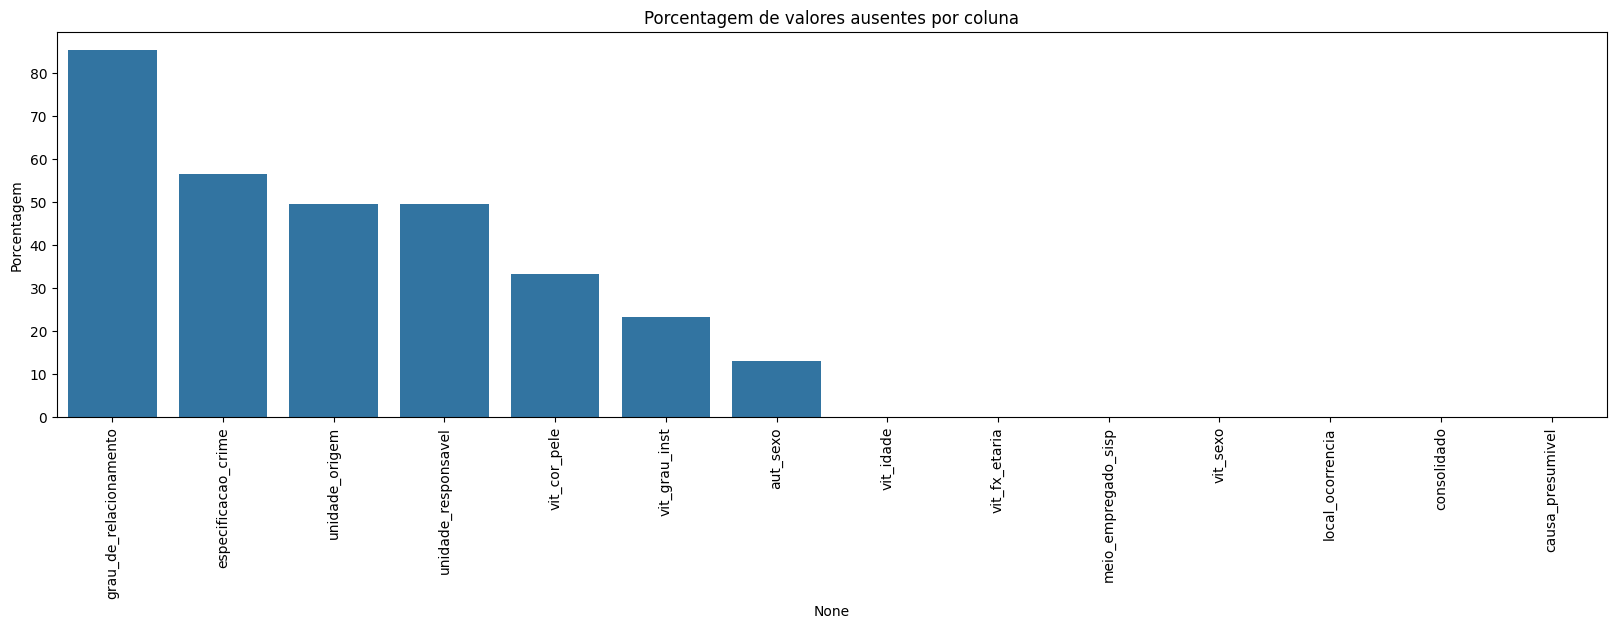

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing.index, y=missing["Porcentagem"])
plt.xticks(rotation='vertical')
plt.title(f"Porcentagem de valores ausentes por coluna")
plt.show()

- Como as colunas "local_ocorrencia", "consolidado", "causa_presumivel", "vit_sexo" e "meio_empregado_sisp"  tem poucos valores missing, serao removidas apenas as linhas com valores faltantes. As colunas vit_idade e vit_fx_etaria serão usadas posteriormente para tratamento da coluna vit_fx_etaria, portanto não é interessante a remoção de linhas nesta etapa.

In [12]:
crimes_df.dropna(subset=["local_ocorrencia","meio_empregado_sisp", "consolidado", "causa_presumivel", "vit_sexo"], inplace=True)

In [13]:
crimes_df.reset_index(drop=True, inplace=True)


In [14]:
missing_by_column_after = crimes_df.isnull().sum()
absol_miss_after = missing_by_column_after[missing_by_column_after > 0].sort_values(ascending=False)
perce_miss_after = absol_miss_after / crimes_df.shape[0] * 100
dtype_miss_after = pd.Series({x: crimes_df[x].dtype for x in absol_miss_after.index})

missing_after = pd.concat([dtype_miss_after, absol_miss_after, perce_miss_after], axis=1)
missing_after.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing_after

,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,481340,85.286358
especificacao_crime,object,318509,56.435103
unidade_origem,object,279064,49.446030
unidade_responsavel,object,279064,49.446030
vit_cor_pele,object,187800,33.275394
vit_grau_inst,object,130685,23.155457
aut_sexo,object,73581,13.037469
vit_idade,float64,243,0.043056
vit_fx_etaria,object,115,0.020376


### Tratamento de valores NaN

Dada a considerável presença de dados nulos, excedendo 50% em várias colunas, a abordagem adotada para mitigar essa lacuna consistirá na substituição dos valores NaN por meio do rótulo "Não informado", visando evitar a perda significativa de dados.

In [15]:
colunas_com_NaN = ["grau_de_relacionamento","especificacao_crime",
                   "unidade_responsavel","unidade_origem","vit_cor_pele","vit_grau_inst",
                   "aut_sexo","vit_idade","vit_fx_etaria"]
crimes_df.loc[:, colunas_com_NaN] = crimes_df.loc[:, colunas_com_NaN].fillna("Nao informado")

In [16]:
crimes_df.isnull().sum()

unidade_origem            0
unidade_responsavel       0
dia_semana                0
fx_4_hor                  0
mes_fato                  0
ano_fato                  0
consolidado               0
especificacao_crime       0
causa_presumivel          0
meio_empregado_sisp       0
bairros                   0
local_ocorrencia          0
vit_idade                 0
vit_fx_etaria             0
vit_sexo                  0
vit_cor_pele              0
vit_grau_inst             0
grau_de_relacionamento    0
aut_sexo                  0
dtype: int64

### 2. Abordando inconsistências

Durante esta fase, procederemos com a normalização de valores que foram registrados de maneiras diversas, mas que representam o mesmo conceito e tratamento de informacoes nao pertinentes.

1. Verificar os objetos diferentes que compoem cada coluna e quantos se repetem

- vit_sexo

In [17]:
crimes_df.vit_sexo.value_counts()

vit_sexo
M             286957
F             239338
PJ             25484
JL              8826
NI              2443
P               1205
PARDA            105
JA LANCADO        22
BRANCA             1
Name: count, dtype: int64

In [18]:
crimes_df[crimes_df['vit_sexo'] == 'BRANCA']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
254074,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,TER,18 |-- 24,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,SEM INSTRUMENTO,GUAMA,RESIDENCIA PARTICULAR,37.0,ADULTO IV (35 A 64 ANOS),BRANCA,F,ENSINO MEDIO INCOMPLETO,Nao informado,M


Nesta linha da base, é perceptivel o erro na transcrição das informações, visto que a coluna vit_cor_pel e vit_sexo estao com os valores trocados. Como se trata de um caso sobre violencia contra a mulher, será feita a correção.

In [19]:
condicao_sexo_cor = (crimes_df['vit_sexo'] == 'BRANCA') & (crimes_df['vit_cor_pele'] == 'F')
crimes_df.loc[condicao_sexo_cor, ['vit_sexo', 'vit_cor_pele']] = ['F', 'BRANCA']

In [20]:
crimes_df[crimes_df['vit_sexo'] == 'PARDA']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
159996,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,SAB,06 |-- 12,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,CIUME,OUTROS MEIOS,CREMACAO,VIA PUBLICA,23.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO INCOMPLETO,Nao informado,Nao informado
160019,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,QUI,12 |-- 18,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,OUTROS MEIOS,PEDREIRA,PREDIO,22.0,ADULTO II (25 A 29 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,EX-COMPANHEIRO(A),F
170755,COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP,COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP,DOM,18 |-- 24,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,CIDADE VELHA,"CAFE, BAR, RESTAURANTE",31.0,ADULTO III (30 A 34 ANOS),PARDA,M,ENSINO MEDIO COMPLETO,Nao informado,Nao informado
170756,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,DOM,12 |-- 18,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,ALCOOLISMO / EMBRIAGUEZ,OUTROS MEIOS,CREMACAO,VIA PUBLICA,63.0,ADULTO IV (35 A 64 ANOS),PARDA,M,ENSINO FUNDAMENTAL COMPLETO,SOBRINHO(A),M
170759,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,QUI,12 |-- 18,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,TELEGRAFO SEM FIO,RESIDENCIA PARTICULAR,36.0,ADULTO IV (35 A 64 ANOS),PARDA,M,ENSINO MEDIO COMPLETO,Nao informado,Nao informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281833,MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP,MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP,SEG,06 |-- 12,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,OUTROS MEIOS,MARCO,VIA PUBLICA,52.0,ADULTO IV (35 A 64 ANOS),PARDA,M,ENSINO MEDIO COMPLETO,Nao informado,F
284742,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...,SEX,18 |-- 24,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,TERRA FIRME,RESIDENCIA PARTICULAR,17.0,ADOLESCENTE (12 A 17 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,Nao informado
284817,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,SEG,00 |-- 06,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,RESIDENCIA PARTICULAR,20.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,Nao informado,Nao informado
284827,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DOM,00 |-- 06,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,SEM INSTRUMENTO,SACRAMENTA,"CAFE, BAR, RESTAURANTE",23.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,Nao informado


Para tratar melhor as linhas com 'PARDA' na coluna 'vit_sexo', serão excluidos as linhas em que a vitima não é do sexo feminino e os valores 'JL', 'JA LANCADO', 'P', 'NI' E 'PJ'

In [21]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='PJ'].index, inplace=True)

In [22]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='M'].index, inplace=True)

In [23]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='P'].index, inplace=True)

In [24]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='JL'].index, inplace=True)

In [25]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='JA LANCADO'].index, inplace=True)

In [26]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='NI'].index, inplace=True)

In [27]:
crimes_df.vit_sexo.value_counts()

vit_sexo
F        239339
PARDA       105
Name: count, dtype: int64

In [28]:
crimes_df[(crimes_df['vit_sexo'] == 'PARDA') & (crimes_df['vit_cor_pele'] == 'F')]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
159996,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,SAB,06 |-- 12,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,CIUME,OUTROS MEIOS,CREMACAO,VIA PUBLICA,23.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO INCOMPLETO,Nao informado,Nao informado
160019,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,QUI,12 |-- 18,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,OUTROS MEIOS,PEDREIRA,PREDIO,22.0,ADULTO II (25 A 29 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,EX-COMPANHEIRO(A),F
170761,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DOM,18 |-- 24,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,CIUME,OUTROS MEIOS,TERRA FIRME,RESIDENCIA PARTICULAR,24.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO INCOMPLETO,Nao informado,M
170775,"ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...","ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...",DOM,00 |-- 06,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,PARACURI,RESIDENCIA PARTICULAR,45.0,ADULTO IV (35 A 64 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,Nao informado,M
171020,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,QUA,00 |-- 06,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,OUTROS MEIOS,MANGUEIRAO,RESIDENCIA PARTICULAR,48.0,ADULTO IV (35 A 64 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,Nao informado,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278794,TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...,TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...,TER,06 |-- 12,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,TENONE,VIA PUBLICA,36.0,ADULTO IV (35 A 64 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,EX-NAMORADO(A),M
284742,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...,SEX,18 |-- 24,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,TERRA FIRME,RESIDENCIA PARTICULAR,17.0,ADOLESCENTE (12 A 17 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,Nao informado
284817,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,SEG,00 |-- 06,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,RESIDENCIA PARTICULAR,20.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,Nao informado,Nao informado
284827,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DOM,00 |-- 06,JANEIRO,2020,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,SEM INSTRUMENTO,SACRAMENTA,"CAFE, BAR, RESTAURANTE",23.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,Nao informado


In [29]:
condicao_sexo_cor_1 = (crimes_df['vit_sexo'] == 'PARDA') & (crimes_df['vit_cor_pele'] == 'F')
crimes_df.loc[condicao_sexo_cor_1, ['vit_sexo', 'vit_cor_pele']] = ['F', 'PARDA']

O restante são valores que estão preenchidos com 'M' na coluna 'vit_cor_pele', serão excluidos a seguir no tratamento da coluna em questao

In [30]:
crimes_df.vit_sexo.value_counts()

vit_sexo
F        239433
PARDA        11
Name: count, dtype: int64

- vit_cor_pele

In [31]:
crimes_df.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO        120338
Nao informado       81234
NAO INFORMADO       34469
PARDA                3129
BRANCA                156
PRETA                  88
M                      11
JA LANCADO              7
INDIGENA                7
PJ, EP E OUTROS         4
AMARELA                 1
Name: count, dtype: int64

In [32]:
crimes_df.loc[crimes_df.vit_cor_pele == "Nao informado",'vit_cor_pele']= 'PREJUDICADO'

In [33]:
crimes_df.loc[crimes_df.vit_cor_pele == "NAO INFORMADO",'vit_cor_pele']= 'PREJUDICADO'

In [34]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_cor_pele']=='M'].index, inplace=True)

In [35]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_cor_pele']=='JA LANCADO'].index, inplace=True)

In [36]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_cor_pele']=='PJ, EP E OUTROS'].index, inplace=True)

In [37]:
crimes_df.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO    236041
PARDA            3129
BRANCA            156
PRETA              88
INDIGENA            7
AMARELA             1
Name: count, dtype: int64

- local_ocorrencia

In [38]:
local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique().tolist()
print("Numero unico de local_ocorrencia: ", len(local_ocorrencia_unico))
local_ocorrencia_unico

Numero unico de local_ocorrencia:  194


['VIA PUBLICA',
 'TRANSPORTE',
 'OUTROS',
 'RESIDENCIA PARTICULAR',
 'MAR, RIO, LAGOA',
 'CAFE,BAR,ETC',
 'HOSPITAL',
 'OUTROS ESTADOS',
 'ESTABELECIMENTO BANCARIO',
 'CONDOMINIO COMERCIAL',
 'ESTABELECIMENTO DE ENSINO',
 'LOGRADORO PUBLICO',
 'INTERNET',
 'CASA COMERCIAL',
 'CAFE, BAR, RESTAURANTE',
 'PREDIO',
 'CONDOMINIO RESIDENCIAL',
 'EDIFICIO PUBLICO',
 'VIA PUBLICA ',
 'CASA DE TOLERANCIA',
 'CRECHE',
 'LOJAS DE CONVENIENCIA',
 'TRANSPORTE ',
 'CASA COMERCIAL ',
 'CAIXA ELETRONICO',
 'LOJA ',
 'LOJA',
 'VIA FERREA',
 'FARMACIA',
 'REDIDENCIA PARTICULAR ',
 'HOTEL, PENSAO, ETC',
 'HABITACAO COLETIVA',
 'SUPERMERCADO',
 'OUTROS PAISES',
 'PENITENCIARIA, REFORMATORIO',
 'PREDIO EM OBRAS',
 'MERCADINHO',
 'LOJA DE CONVENIENCIA ',
 'IGREJA',
 'SALAO DE BELEZA',
 'POSTO DE GASOLINA',
 'CLINICA ',
 'TERRENO BALDIO',
 'COOPERATIVA',
 'CAMPUS UNIVERSITARIO',
 'CRAS',
 'ORGAO PUBLICO',
 'PANIFICADORA',
 'BAR',
 'FARMACIA ',
 'CLUBE',
 'SALAO DE BELEZA ',
 'EMPRESA',
 'CONSULTORIO',
 'TRAN

In [39]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA PUBLICA ",'local_ocorrencia'] = 'VIA PUBLICA'

In [40]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE ",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [41]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE URBANO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [42]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [43]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE POR APLICATIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [44]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [45]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPOSTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [46]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [47]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE (COLETIVO, PRIVADO OU ESCOLAR)",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [48]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETVIO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [49]:
crimes_df.loc[crimes_df.local_ocorrencia == "COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [50]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [51]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO, LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'


In [52]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR,RIO,LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'

In [53]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO E LAGOA",'local_ocorrencia']= 'MAR, RIO, LAGOA'


In [54]:
crimes_df.loc[crimes_df.local_ocorrencia == "PORTO",'local_ocorrencia']=  'PORTOS / MARINAS / ATRACADOUROS',

In [55]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR / OCEANO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [56]:
crimes_df.loc[crimes_df.local_ocorrencia == "REPRESAS",'local_ocorrencia']='MAR, RIO, LAGOA'

In [57]:
crimes_df.loc[crimes_df.local_ocorrencia == "RIO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [58]:
crimes_df.loc[crimes_df.local_ocorrencia == "IGARAPE",'local_ocorrencia']='MAR, RIO, LAGOA'

In [59]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESTAURANTE ",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [60]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOSPITAL ",'local_ocorrencia'] = 'HOSPITAL'

In [61]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO DE COMERCIAL",'local_ocorrencia'] = 'ESTABELECIMENTO COMERCIAL'

In [62]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO PRISIONAL",'local_ocorrencia'] = 'PENITENCIARIA, REFORMATORIO'

In [63]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (INTERNET)",'local_ocorrencia'] = 'INTERNET'

In [64]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (NTERNET)",'local_ocorrencia'] = 'INTERNET'

In [65]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (PIX)",'local_ocorrencia'] = 'INTERNET'

In [66]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL",'local_ocorrencia'] = 'INTERNET'

In [67]:
crimes_df.loc[crimes_df.local_ocorrencia == "INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAGENS, E-MAIL, SITES, BLOGS, PORTAIS E OUTROS)",'local_ocorrencia'] = 'INTERNET'

In [68]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA COMERCIAL ",'local_ocorrencia'] = 'CASA COMERCIAL'

In [69]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO EM OBRAS",'local_ocorrencia'] = 'PREDIO'


In [70]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO DO JORNAL",'local_ocorrencia'] = 'PREDIO'

In [71]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO/PALACIO DO RADIO",'local_ocorrencia'] = 'PREDIO'

In [72]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA ",'local_ocorrencia'] = 'LOJA'

In [73]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMERICANAS",'local_ocorrencia'] = 'LOJA'

In [74]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA DE CONVENIENCIA ",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [75]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJAS DE CONVENIENCIA",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [76]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA FERREA",'local_ocorrencia'] =   'ESTACAO FERROVIARIA'

In [77]:
crimes_df.loc[crimes_df.local_ocorrencia == "FARMACIA ",'local_ocorrencia'] =   'FARMACIA'

In [78]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [79]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [80]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROPRIEDADE RESIDENCIAL URBANA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [81]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO ",'local_ocorrencia'] = 'SUPERMERCADO'

In [82]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO LIDER",'local_ocorrencia'] = 'SUPERMERCADO'

In [83]:
crimes_df.loc[crimes_df.local_ocorrencia == "SALAO DE BELEZA ",'local_ocorrencia'] = 'SALAO DE BELEZA'

In [84]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE GASOLINA ",'local_ocorrencia'] = 'POSTO DE GASOLINA'

In [85]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE SAUDE ",'local_ocorrencia'] = 'POSTO DE SAUDE'

In [86]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLINICA ",'local_ocorrencia'] = 'CLINICA'

In [87]:
crimes_df.loc[crimes_df.local_ocorrencia == "PANIFICADORA ",'local_ocorrencia'] = 'PANIFICADORA'

In [88]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBE\\r\\n",'local_ocorrencia'] = 'CLUBE'

In [89]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBES E AGREMIACOES",'local_ocorrencia'] = 'CLUBE'

In [90]:
crimes_df.loc[crimes_df.local_ocorrencia == "INDUSTRIA",'local_ocorrencia'] = 'ESTABELECIMENTO INDUSTRIAL'

In [91]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO ",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [92]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO BANCARIO",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [93]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROSTIBULO",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [94]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA DE TOLERANCIA",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [95]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTADIO DE FUTEBOL",'local_ocorrencia'] = 'ESTADIO ESPORTIVO'

In [96]:
crimes_df.loc[crimes_df.local_ocorrencia == "LANCHONETE ",'local_ocorrencia'] =  'LANCHONETE'

In [97]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING ",'local_ocorrencia'] =  'SHOPPING'

In [98]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING BOULEVARD",'local_ocorrencia'] =  'SHOPPING'

In [99]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO ",'local_ocorrencia'] =  'DEPOSITO'

In [100]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO DE GAS ",'local_ocorrencia'] =  'DEPOSITO'

In [101]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOCADORA DE AUTOMOVEIS",'local_ocorrencia'] =  'LOCADORA'

In [102]:
crimes_df.loc[crimes_df.local_ocorrencia == "SINDICATO E ASSOCIACAO DE CLASSE",'local_ocorrencia'] =  'SINDICATO'

In [103]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM VEICULO",'local_ocorrencia'] = 'VEICULO'

In [104]:
crimes_df.loc[crimes_df.local_ocorrencia == "CARRO DE TRANSPORTE DE VALORES",'local_ocorrencia'] = 'CARRO FORTE'

In [105]:
crimes_df.loc[crimes_df.local_ocorrencia == "ABRIGO",'local_ocorrencia'] = 'CASA DE ABRIGO E ASSISTENCIA'

In [106]:
crimes_df.loc[crimes_df.local_ocorrencia == "ONIBUS",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [107]:
crimes_df.loc[crimes_df.local_ocorrencia == "CENTRO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [108]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [109]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSORTE",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [110]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOTEL",'local_ocorrencia'] = 'HOTEL, PENSAO, ETC'

In [111]:
crimes_df.loc[crimes_df.local_ocorrencia == "AEROPORTOS / PISTA DE POUSO",'local_ocorrencia'] = 'AEROPORTO'

In [112]:
crimes_df.loc[crimes_df.local_ocorrencia == "SEM INFORMACAO",'local_ocorrencia'] =  'NAO INFORMADO'

In [113]:
crimes_df.loc[crimes_df.local_ocorrencia == "OUTRO",'local_ocorrencia'] = 'OUTROS LOCAIS'


In [114]:
novo_local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique()
print("Numero unico de local_ocorrencia:", len(novo_local_ocorrencia_unico))
novo_local_ocorrencia_unico


Numero unico de local_ocorrencia: 125


array(['VIA PUBLICA', 'TRANSPORTE', 'OUTROS', 'RESIDENCIA PARTICULAR',
       'MAR, RIO, LAGOA', 'CAFE,BAR,ETC', 'HOSPITAL', 'OUTROS ESTADOS',
       'ESTABELECIMENTO BANCARIO', 'CONDOMINIO COMERCIAL',
       'ESTABELECIMENTO DE ENSINO', 'LOGRADORO PUBLICO', 'INTERNET',
       'CASA COMERCIAL', 'CAFE, BAR, RESTAURANTE', 'PREDIO',
       'CONDOMINIO RESIDENCIAL', 'EDIFICIO PUBLICO',
       'LOCAL DE PROSTITUICAO', 'CRECHE', 'LOJA DE CONVENIENCIA',
       'TRANSPORTE(PUBLICO, URBANO, ETC)', 'CAIXA ELETRONICO', 'LOJA',
       'ESTACAO FERROVIARIA', 'FARMACIA', 'REDIDENCIA PARTICULAR ',
       'HOTEL, PENSAO, ETC', 'HABITACAO COLETIVA', 'SUPERMERCADO',
       'OUTROS PAISES', 'PENITENCIARIA, REFORMATORIO', 'MERCADINHO',
       'IGREJA', 'SALAO DE BELEZA', 'POSTO DE GASOLINA', 'CLINICA',
       'TERRENO BALDIO', 'COOPERATIVA', 'CAMPUS UNIVERSITARIO', 'CRAS',
       'ORGAO PUBLICO', 'PANIFICADORA', 'BAR', 'CLUBE', 'EMPRESA',
       'CONSULTORIO', 'ESTABELECIMENTO INDUSTRIAL', 'LOTERICA',
   

- Grau de relacionamento

In [115]:
grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(grau_de_relac_unico))
grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 62


array(['Nao informado', 'NAO INFORMADO', 'COMPANHEIRO(A)',
       'EX-COMPANHEIRO(A)', 'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)',
       'AVO', 'AMIGO(A)', 'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)',
       'CONHECIDO(A)', 'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE',
       'GENRO', 'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'EX-PADASTRO', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'PJ, EP E OUTROS',
       'ENTEADO(A)', 'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO',
       'EX-SOGRO(A)', 'NETO', 'MADRINHA', 'CHEFE',
       'PARENTE POR AFINIDADE', 'PROFESSOR(A)', 'POR AFINIDADE',
       'EX - CUNHADO(A)', 'PRIMA', 'TIO', 'TIO(A', 'EX-AMANTE',
       'EX-CUNHADA', 'EX-SOGRA', 'EX-SOGRO (A)', 'EX-CUNHADO (A)',
       'JOSIVAN CONCEICAO DOS SANTOS', 'PREJUDUICADO',
       'PARENTESCO POR AFINIDADE ', 'PREJUDICAOD', 'EX COMPANHEIRO',
       'PREJUICADO', 'EX-CUNHDO (A)', 'PAI DO PADRASTO', 'EX-ENTEADO(A)'

In [116]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "Nao informado",'grau_de_relacionamento'] = 'NAO INFORMADO'

In [117]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX COMPANHEIRO",'grau_de_relacionamento'] =  'EX-COMPANHEIRO(A)'

In [118]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO",'grau_de_relacionamento'] =  'TIO(A)'

In [119]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO(A",'grau_de_relacionamento'] =  'TIO(A)'

In [120]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PRIMA",'grau_de_relacionamento'] =  'PRIMO(A)'

In [121]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX - CUNHADO(A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [122]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADA",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [123]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [124]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHDO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [125]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "NETO",'grau_de_relacionamento'] =  'NETO(A)'

In [126]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-PADASTRO",'grau_de_relacionamento'] =  'EX-PADRASTO'

In [127]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTESCO POR AFINIDADE ",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [128]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [129]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTE POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [130]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [131]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDICAOD",'grau_de_relacionamento'] =  'PREJUDICADO'

In [132]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [133]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRA",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [134]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRO (A)",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [135]:
crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
453653,Nao informado,Nao informado,TER,18 |-- 24,JUNHO,2022,FURTO,EM COLETIVO/CELULAR,AMBICAO,SEM INSTRUMENTO,CAMPINA,VEICULO,22.0,ADULTO I (18 A 24 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,JOSIVAN CONCEICAO DOS SANTOS,M


Como o crime consolidado não corresponde de fato a um crime contra a mulher, esta linha será excluida

In [136]:
crimes_df.drop(crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"].index, inplace=True)

In [137]:
crimes_df.reset_index(drop=True, inplace=True)

In [138]:
crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
73924,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,12 |-- 18,NOVEMBRO,2020,HOMICIDIO CULPOSO,ERRO MEDICO,OUTRAS,OUTROS MEIOS,PARQUE VERDE,HOSPITAL,23.0,ADULTO I (18 A 24 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,"PJ, EP E OUTROS",PJ
74996,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,SAB,12 |-- 18,DEZEMBRO,2020,LESAO DECORRENTE DE INTERVENCAO DE AGENTE DO E...,INTERVENCAO POLICIAL,OUTRAS,ARMA DE FOGO,BARREIRO,VIA PUBLICA,24.0,ADULTO I (18 A 24 ANOS),F,PARDA,Nao informado,"PJ, EP E OUTROS",PJ
82426,DEL.VIRTUAL - 277,BENGUI - UNID.POLICIA 412- 1º RISP-10ª AISP,SAB,18 |-- 24,AGOSTO,2020,PARA FINS DE DIREITO,CONTRA O CONSUMIDOR,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,BENGUI,OUTROS,27.0,ADULTO II (25 A 29 ANOS),F,PREJUDICADO,NAO INFORMADO,"PJ, EP E OUTROS",PJ
104604,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,SEG,18 |-- 24,AGOSTO,2020,PERTURBACAO DO SOSSEGO ALHEIO,NAO INFORMADO,OUTRAS,OUTROS MEIOS,CREMACAO,OUTROS,53.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,"PJ, EP E OUTROS",PJ
104607,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,SEG,18 |-- 24,AGOSTO,2020,PERTURBACAO DO SOSSEGO ALHEIO,NAO INFORMADO,OUTRAS,OUTROS MEIOS,CREMACAO,OUTROS,37.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,"PJ, EP E OUTROS",PJ
107971,DIVISAO DE HOMICIDIOS,DIVISAO DE HOMICIDIOS,SEX,06 |-- 12,DEZEMBRO,2020,APRESENTACAO - MANDADO DE PRISAO,Nao informado,OUTRAS,SEM INSTRUMENTO,UMARIZAL,HOSPITAL,47.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,Nao informado,"PJ, EP E OUTROS",PJ
108605,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,QUI,12 |-- 18,AGOSTO,2020,ESTELIONATO,MEDIANTE FRAUDE,AMBICAO,SEM INSTRUMENTO,CABANAGEM,RESIDENCIA PARTICULAR,40.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,"PJ, EP E OUTROS",PJ
110942,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,QUI,12 |-- 18,AGOSTO,2020,ESTELIONATO,MEDIANTE FRAUDE,AMBICAO,SEM INSTRUMENTO,CABANAGEM,RESIDENCIA PARTICULAR,17.0,ADOLESCENTE (12 A 17 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,"PJ, EP E OUTROS",PJ
117531,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,QUI,18 |-- 24,OUTUBRO,2020,OMISSAO DE SOCORRO,NAO INFORMADO,OUTRAS,SEM INSTRUMENTO,SAO BRAS,HOSPITAL,83.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,"PJ, EP E OUTROS",PJ
118437,DEL.VIRTUAL - 277,BENGUI - UNID.POLICIA 412- 1º RISP-10ª AISP,TER,12 |-- 18,SETEMBRO,2020,ESTELIONATO,Nao informado,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,BENGUI,RESIDENCIA PARTICULAR,46.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,Nao informado,"PJ, EP E OUTROS",PJ


As linhas em que a coluna "grau_de_relacionamento" está preenchida com o valor "PJ, EP, OUTROS" serão removidas, dado que tal condição não possui impacto significativo na análise.

In [139]:
crimes_df.drop(crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [140]:
novo_grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(novo_grau_de_relac_unico))
novo_grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 41


array(['NAO INFORMADO', 'COMPANHEIRO(A)', 'EX-COMPANHEIRO(A)',
       'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)', 'AVO', 'AMIGO(A)',
       'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)', 'CONHECIDO(A)',
       'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE', 'GENRO',
       'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'ENTEADO(A)',
       'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO', 'EX-SOGRO(A)',
       'MADRINHA', 'CHEFE', 'PROFESSOR(A)', 'EX-AMANTE',
       'PAI DO PADRASTO', 'EX-ENTEADO(A)'], dtype=object)

- vit_fx_etaria	

In [141]:
vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("numero de itens unicos em vit_fx_etaria:", len(vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

numero de itens unicos em vit_fx_etaria: 12


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113154
ADULTO I (18 A 24 ANOS)        33134
ADULTO III (30 A 34 ANOS)      28390
ADULTO II (25 A 29 ANOS)       27888
IDOSO (65 ANOS OU MAIS)        15377
PREJUDICADO                    13554
ADOLESCENTE (12 A 17 ANOS)      3224
NAO INFORMADO                   3131
CRIANCA (0 A 11 ANOS)           1458
PJ, EP E OUTROS                   59
Nao informado                     37
IDOSO(A)                           2
Name: count, dtype: int64

In [142]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
118864,DEL.VIRTUAL - 277,CABANAGEM- UNID.POL.292-1º RISP- 10ª AISP,QUA,06 |-- 12,DEZEMBRO,2020,ROUBO,AO ESTABELECIMENTO COMERCIAL,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,CABANAGEM,OUTROS,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,Nao informado,NAO INFORMADO,M
121177,DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP,DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP,SEG,12 |-- 18,DEZEMBRO,2020,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,TAPANA,OUTROS,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,Nao informado
203868,Nao informado,Nao informado,DOM,18 |-- 24,AGOSTO,2022,INJURIA,Nao informado,OUTRAS,OUTROS MEIOS,AGUAS NEGRAS,LOGRADORO PUBLICO,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,P
203975,Nao informado,Nao informado,DOM,12 |-- 18,AGOSTO,2022,ROUBO,TRANSEUNTE/CELULAR,OUTRAS,OUTROS MEIOS,SACRAMENTA,VIA PUBLICA,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,NAO INFORMADO,M
203976,Nao informado,Nao informado,SEX,00 |-- 06,AGOSTO,2022,FURTO,EM ESTABELECIMENTO COMERCIAL/CELULAR,OUTRAS,OUTROS MEIOS,REDUTO,"CAFE, BAR, RESTAURANTE",88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,NAO INFORMADO,F
203977,Nao informado,Nao informado,TER,18 |-- 24,AGOSTO,2022,RECUPERACAO DE VEICULOS,LEVE,OUTRAS,OUTROS MEIOS,TAPANA,VIA PUBLICA,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,NAO INFORMADO,P
203978,Nao informado,Nao informado,SEG,00 |-- 06,AGOSTO,2022,ROUBO,TRANSEUNTE/CELULAR,OUTRAS,OUTROS MEIOS,SAO BRAS,VIA PUBLICA,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,M
203979,Nao informado,Nao informado,SEG,12 |-- 18,AGOSTO,2022,ROUBO,TRANSEUNTE/CELULAR,OUTRAS,OUTROS MEIOS,FATIMA,VIA PUBLICA,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,M
203980,Nao informado,Nao informado,SEG,00 |-- 06,AGOSTO,2022,INJURIA,Nao informado,OUTRAS,OUTROS MEIOS,PARQUE GUAJARA,ESTABELECIMENTOS DE SAUDE,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,P
203981,Nao informado,Nao informado,TER,06 |-- 12,AGOSTO,2022,FALSA IDENTIDADE,Nao informado,OUTRAS,OUTROS MEIOS,PARQUE GUAJARA,HOSPITAL,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,NAO INFORMADO,P


In [143]:
filtro_vit_fx_etaria = (crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS')
filtrado_vit_fx_etaria = crimes_df[filtro_vit_fx_etaria] 
tipos_consolidado = filtrado_vit_fx_etaria['consolidado'].value_counts()

In [144]:
tipos_consolidado

consolidado
AMEACA                                11
ROUBO                                  7
ESTELIONATO                            7
FALSA IDENTIDADE                       5
ACIDENTE DE TRANSITO SEM VITIMA        5
INVASAO DE DISPOSITIVO INFORMATICO     5
INJURIA                                5
PARA FINS DE DIREITO                   3
FURTO                                  2
RECUPERACAO DE VEICULOS                1
PESSOA ENCONTRADA                      1
DANO CIVIL                             1
ACIDENTE FORTUITO COM LESAO            1
FALSIDADE IDEOLOGICA                   1
ESTUPRO                                1
COMUNICACAO DE OBITO                   1
LESAO CORPORAL                         1
MAUS TRATOS                            1
Name: count, dtype: int64

Agora poderemos separar apenas crimes que podem ser considerados crimes contra a mulher.


In [145]:
crimes_df.drop(crimes_df[((crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS') & (crimes_df['consolidado'].isin(['ROUBO', 'ESTELIONATO','FALSA IDENTIDADE','ACIDENTE DE TRANSITO SEM VITIMA','FURTO','PARA FINS DE DIREITO','RECUPERACAO DE VEICULOS','PESSOA ENCONTRADA','ACIDENTE FORTUITO COM LESAO','FALSIDADE IDEOLOGICA','COMUNICACAO DE OBITO'])))].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [146]:
crimes_df.loc[crimes_df.vit_fx_etaria == "IDOSO(A)",'vit_fx_etaria'] = 'IDOSO (65 ANOS OU MAIS)'

In [147]:
crimes_df.loc[crimes_df.vit_fx_etaria == "Nao informado",'vit_fx_etaria'] = 'NAO INFORMADO'

In [148]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PREJUDICADO']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
3,DEL.VIRTUAL - 277,MARCO - UNID.POL. 14 - 1º RISP,DOM,18 |-- 24,ABRIL,2019,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,ARMA DE FOGO,MARCO,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,Nao informado,NAO INFORMADO,M
4,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,QUA,06 |-- 12,ABRIL,2019,ROUBO,TRANSEUNTE/CELULAR,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MARAMBAIA,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,M
5,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,SEX,12 |-- 18,JUNHO,2019,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MARAMBAIA,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,NI
6,DEL.VIRTUAL - 277,SAO BRAS - PATRIMONIO 228 - 1º RISP- 2ª AISP,QUA,12 |-- 18,JUNHO,2019,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,NAZARE,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,M
11,GUANABARA - DELEGACIA DE POLICIA - 2ª RISP - 1...,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,12 |-- 18,MAIO,2019,ROUBO,TRANSEUNTE/CELULAR,AMBICAO,ARMA DE FOGO,CASTANHEIRA,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,Nao informado,NAO INFORMADO,NI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238840,Nao informado,Nao informado,SEX,18 |-- 24,ABRIL,2022,ROUBO,TRANSEUNTE,OUTRAS,OUTROS MEIOS,MANGUEIRAO,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,NAO INFORMADO,M
238915,Nao informado,Nao informado,DOM,18 |-- 24,MAIO,2022,LESAO NO TRANSITO,COLISAO,OUTRAS,ONIBUS,MURUBIRA,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,NAO INFORMADO,M
238917,Nao informado,Nao informado,SEX,12 |-- 18,MAIO,2022,COMUNICACAO DE OBITO,MORTE NATURAL,OUTRAS,SEM INSTRUMENTO,COQUEIRO BELEM,RESIDENCIA PARTICULAR,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,NAO INFORMADO,P
239308,Nao informado,Nao informado,SEG,06 |-- 12,MAIO,2022,LESAO NO TRANSITO,COLISAO,OUTRAS,OUTROS MEIOS,VAL-DE-CANS,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,NAO INFORMADO,F


In [149]:
filtro_vit_fx_etaria_1 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_1 = crimes_df[filtro_vit_fx_etaria_1]
idade_vit = filtrado_vit_fx_etaria_1['vit_idade'].value_counts()

In [150]:
idade_vit

vit_idade
66666.0          12524
99999.0            978
Nao informado       33
118.0               12
36.0                 2
41.0                 2
32.0                 1
37.0                 1
88888.0              1
Name: count, dtype: int64

In [151]:
crimes_df[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0)]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
31891,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM,COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP,SEG,06 |-- 12,OUTUBRO,2019,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,ODIO OU VINGANCA,OUTROS MEIOS,UMARIZAL,RESIDENCIA PARTICULAR,36.0,PREJUDICADO,F,PARDA,NAO INFORMADO,FILHO(A),F
39376,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,DOM,12 |-- 18,AGOSTO,2019,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,OUTRAS,OUTROS MEIOS,PEDREIRA,RESIDENCIA PARTICULAR,36.0,PREJUDICADO,F,PARDA,NAO INFORMADO,IRMAO(A),M


In [152]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [153]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 41.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [154]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 32.0), 'vit_fx_etaria'] = 'ADULTO III (30 A 34 ANOS)'

In [155]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 37.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

Agora a coluna 'vit_idade' pode ser excluida 

In [156]:
crimes_df = crimes_df.drop(columns=['vit_idade'])
crimes_df.reset_index(drop=True, inplace=True)

In [157]:
novo_vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 10


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113159
ADULTO I (18 A 24 ANOS)        33134
ADULTO III (30 A 34 ANOS)      28391
ADULTO II (25 A 29 ANOS)       27888
IDOSO (65 ANOS OU MAIS)        15379
PREJUDICADO                    13548
ADOLESCENTE (12 A 17 ANOS)      3224
NAO INFORMADO                   3168
CRIANCA (0 A 11 ANOS)           1458
PJ, EP E OUTROS                   25
Name: count, dtype: int64

In [158]:
filtro_vit_fx_etaria_2 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_2 = crimes_df[filtro_vit_fx_etaria_2]
tipos_consolidado_1 = filtrado_vit_fx_etaria_2['consolidado'].unique()
tipos_consolidado_1

array(['ROUBO', 'FURTO', 'PARA FINS DE DIREITO', 'LESAO NO TRANSITO',
       'HOMICIDIO', 'ROUBO DE VEICULO', 'APRESENTACAO SUSPEITO DE ROUBO',
       'DANO NO TRANSITO', 'APREENSAO DE OBJETOS', 'AMEACA',
       'LESAO CORPORAL', 'DANO', 'DESAPARECIMENTO DE PESSOA',
       'MORTE A ESCLARECER', 'COMUNICACAO DE OBITO',
       'RECUPERACAO DE VEICULOS', 'ACIDENTE FORTUITO COM DANO',
       'PARA FINS DE PROCEDIMENTO', 'POLUICAO SONORA',
       'AFOGAMENTO COM MORTE', 'JA LANCADO', 'HOMICIDIO CULPOSO',
       'ESTUPRO', 'PRODUZIR,REPRODUZIR,DIRIGIR,FOTOGRAFAR,FILMAR',
       'EXTORSAO', 'ESBULHO POSSESSORIO',
       'CUMPRIMENTO DE MANDADO DE BUSCA E APREENSAO',
       'ACIDENTE DE TRABALHO COM LESAO', 'IMPORTUNACAO SEXUAL',
       'PORTE ILEGAL DE ARMA DE FOGO DE USO PERMITIDO', 'OUTRAS FRAUDES',
       'ABORTO PROVOCADO PELA GESTANTE OU COM O SEU CONSENTIMENTO',
       'PERIGO DE CONTAGIO DE MOLESTIA GRAVE', 'ESTELIONATO',
       'SE O CRIME FOR PRATICADO CONTRA PESSOA COM DEFICIENCIA M

In [159]:
crimes_df.drop(crimes_df[((crimes_df['vit_fx_etaria']== 'PREJUDICADO') & ~(crimes_df['consolidado'].isin(['LESAO CORPORAL', 'AMEACA', 'CONFLITOS FAMILIARES', 'ESTUPRO DE VULNERAVEL', 'TENTATIVA DE HOMICIDIO', 'MAUS TRATOS', 'LESAO CORPORAL CULPOSA', 'IMPORTUNACAO SEXUAL', 'ESTUPRO', 'INJURIA', 'VIAS DE FATO', 'HOMICIDIO', 'CONSTRANGIMENTO ILEGAL', 'TENTATIVA DE ESTUPRO DE VULNERAVEL', 'HOMICIDIO CULPOSO', 'DIFAMACAO', 'TENTATIVA DE ESTUPRO', 'ASSEDIO SEXUAL', 'INVASAO DE DISPOSITIVO INFORMATICO', 'ASSEDIO MORAL', 'VIOLACAO SEXUAL MEDIANTE FRAUDE', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS'])))].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

Como os valores 'PJ, EP E OUTROS', 'JA LANCADO' e  não são interessantes para a analise serão escluidos

In [160]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_fx_etaria']=='JA LANCADO'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [161]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_fx_etaria']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [162]:
novo_vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 9


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113159
ADULTO I (18 A 24 ANOS)        33134
ADULTO III (30 A 34 ANOS)      28391
ADULTO II (25 A 29 ANOS)       27888
IDOSO (65 ANOS OU MAIS)        15379
ADOLESCENTE (12 A 17 ANOS)      3224
NAO INFORMADO                   3168
CRIANCA (0 A 11 ANOS)           1458
PREJUDICADO                      380
Name: count, dtype: int64

- meio_empregado_sisp

In [163]:
crimes_df.meio_empregado_sisp.value_counts()

meio_empregado_sisp
SEM INSTRUMENTO                   104813
OUTROS MEIOS                      103273
ARMA DE FOGO                        8516
ARMA CORTANTE OU PERFURANTE         2261
AUTOMOVEL DE PASSEIO                2174
ARMA CONTUNDENTE                    1348
MOTOCICLETA                         1270
ARMA PERFURO CORTANTE               1053
ONIBUS                               533
AUTOMOVEL COMERCIAL                  311
BICICLETA                            238
CAMINHAO                             135
FOGO                                  86
NAO INFORMADO                         41
OUTROS                                29
VENENO - OUTROS TIPOS                 28
WHATSAPP                              28
VENENO - CHUMBINHO                    12
FACEBOOK                              12
INSTAGRAM                              8
AUTOMÓVEL DE PASSEIO                   6
TWITTER                                3
AUTOMÓVEL COMERCIAL                    2
ARMA PERFURO CORTANTE_X000D_\n       

In [164]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "ARMA PERFURO CORTANTE_X000D_\n",'meio_empregado_sisp'] = 'ARMA PERFURO CORTANTE'

In [165]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "AUTOMÓVEL COMERCIAL",'meio_empregado_sisp'] = 'AUTOMOVEL COMERCIAL'


In [166]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "OUTROS",'meio_empregado_sisp'] = 'OUTROS MEIOS'

In [167]:
crimes_df.meio_empregado_sisp.value_counts()

meio_empregado_sisp
SEM INSTRUMENTO                104813
OUTROS MEIOS                   103302
ARMA DE FOGO                     8516
ARMA CORTANTE OU PERFURANTE      2261
AUTOMOVEL DE PASSEIO             2174
ARMA CONTUNDENTE                 1348
MOTOCICLETA                      1270
ARMA PERFURO CORTANTE            1054
ONIBUS                            533
AUTOMOVEL COMERCIAL               313
BICICLETA                         238
CAMINHAO                          135
FOGO                               86
NAO INFORMADO                      41
VENENO - OUTROS TIPOS              28
WHATSAPP                           28
VENENO - CHUMBINHO                 12
FACEBOOK                           12
INSTAGRAM                           8
AUTOMÓVEL DE PASSEIO                6
TWITTER                             3
Name: count, dtype: int64

- causa_presumivel

In [168]:
crimes_df.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   119567
IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     42777
AMBICAO                                   32829
ODIO OU VINGANCA                          22307
CIUME                                      2268
DEVASSIDAO                                 2048
ALCOOLISMO / EMBRIAGUEZ                    1839
ACIDENTAL                                  1482
ENTORPECENTES                               358
ALIENACAO                                   333
AMBIÇÃO                                      82
AMBICÃO                                      74
LGBTFOBIA                                    61
ÓDIO OU VINGANÇA                             58
ÓDIO OU VINGANCA                             50
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA        22
CIÚME                                        11
DEVASSIDÃO                                   10
ALIENAÇÃO                                     2
ROUBO                                         1
ALIENACÃO              

In [169]:
crimes_df.loc[crimes_df.causa_presumivel == "IMPERICIA / IMPRUDENCIA / NEGLIGENCIA",'causa_presumivel'] = 'IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA'

In [170]:
crimes_df.loc[crimes_df.causa_presumivel == "AMBICÃO",'causa_presumivel'] = 'AMBIÇÃO'

In [171]:
crimes_df.loc[crimes_df.causa_presumivel == "ÓDIO OU VINGANCA",'causa_presumivel'] = 'ÓDIO OU VINGANÇA'

In [172]:
crimes_df.loc[crimes_df.causa_presumivel == "CIUME",'causa_presumivel'] = 'CIÚME'

In [173]:
crimes_df.loc[crimes_df.causa_presumivel == "ALIENACAO",'causa_presumivel'] = 'ALIENAÇÃO'

In [174]:
crimes_df.loc[crimes_df.causa_presumivel == "ALIENACÃO",'causa_presumivel'] = 'ALIENAÇÃO'

In [175]:
crimes_df.loc[crimes_df.causa_presumivel == "DEVASSIDAO",'causa_presumivel'] = 'DEVASSIDÃO'

In [176]:
crimes_df.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   119567
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     42799
AMBICAO                                   32829
ODIO OU VINGANCA                          22307
CIÚME                                      2279
DEVASSIDÃO                                 2058
ALCOOLISMO / EMBRIAGUEZ                    1839
ACIDENTAL                                  1482
ENTORPECENTES                               358
ALIENAÇÃO                                   336
AMBIÇÃO                                     156
ÓDIO OU VINGANÇA                            108
LGBTFOBIA                                    61
ROUBO                                         1
PREJUDICADO                                   1
Name: count, dtype: int64

- fx_4_hor

In [177]:
crimes_df.fx_4_hor.value_counts()

fx_4_hor
06 |-- 12    76425
12 |-- 18    73875
18 |-- 24    57827
00 |-- 06    18054
Name: count, dtype: int64

- ano_fato

In [178]:
crimes_df.ano_fato.value_counts()

ano_fato
2021    60761
2022    56323
2019    55894
2020    53182
2018       20
2012        1
Name: count, dtype: int64

In [179]:
crimes_df[crimes_df['ano_fato']== 2012]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo
198575,Nao informado,Nao informado,SEG,12 |-- 18,JUNHO,2012,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,MANGUEIRAO,OUTROS LOCAIS,ADULTO II (25 A 29 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,P


Devido a analise ser sobre os crimes de 2019 a 2022, as linhas que não estão neste intervalo serão removidas.

In [180]:
crimes_df.drop(crimes_df[crimes_df['ano_fato'].isin([2012, 2018])].index, inplace=True)

In [181]:
crimes_df.ano_fato.value_counts()

ano_fato
2021    60761
2022    56323
2019    55894
2020    53182
Name: count, dtype: int64

- vit_grau_inst

In [182]:
crimes_df.vit_grau_inst.value_counts()

vit_grau_inst
ENSINO MEDIO COMPLETO              58551
Nao informado                      51587
ENSINO SUPERIOR COMPLETO           36182
NAO INFORMADO                      20916
ENSINO FUNDAMENTAL INCOMPLETO      18552
ENSINO SUPERIOR INCOMPLETO         12815
ENSINO MEDIO INCOMPLETO            12217
ENSINO FUNDAMENTAL COMPLETO        10615
PREJUDICADO                         3619
NAO ALFABETIZADO                     985
POS-GRADUACAO/ESPECIALIZACAO          38
SUPERIOR COMPLETO                     34
SUPERIOR INCOMPLETO                   16
ESPECIALIZACAO                        15
MESTRADO                               9
DOUTORADO                              4
ANALFABETO                             2
2º GRAU COMPLETO (ENSINO MEDIO)        2
ESTUDANTE                              1
Name: count, dtype: int64

In [191]:
crimes_df.loc[crimes_df.vit_grau_inst == "Nao informado",'vit_grau_inst'] = 'NAO INFORMADO'

In [194]:
crimes_df.loc[crimes_df.vit_grau_inst == "2º GRAU COMPLETO (ENSINO MEDIO)", 'vit_grau_inst'] = 'ENSINO MEDIO COMPLETO'

In [195]:
crimes_df.loc[crimes_df.vit_grau_inst == "ANALFABETO", 'vit_grau_inst'] = 'NAO ALFABETIZADO'

In [196]:
crimes_df.loc[crimes_df.vit_grau_inst == "SUPERIOR COMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR COMPLETO'

In [197]:
crimes_df.loc[crimes_df.vit_grau_inst == "SUPERIOR INCOMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR INCOMPLETO'

In [198]:
crimes_df.loc[crimes_df.vit_grau_inst == "ESPECIALIZACAO", 'vit_grau_inst'] = 'POS-GRADUACAO/ESPECIALIZACAO'

In [199]:
crimes_df.vit_grau_inst.value_counts()

vit_grau_inst
NAO INFORMADO                    72503
ENSINO MEDIO COMPLETO            58553
ENSINO SUPERIOR COMPLETO         36216
ENSINO FUNDAMENTAL INCOMPLETO    18552
ENSINO SUPERIOR INCOMPLETO       12831
ENSINO MEDIO INCOMPLETO          12217
ENSINO FUNDAMENTAL COMPLETO      10615
PREJUDICADO                       3619
NAO ALFABETIZADO                   987
POS-GRADUACAO/ESPECIALIZACAO        53
MESTRADO                             9
DOUTORADO                            4
ESTUDANTE                            1
Name: count, dtype: int64

- aut_sexo

In [200]:
crimes_df.aut_sexo.value_counts()

aut_sexo
NI               91366
M                52483
P                44892
Nao informado    31537
F                 5767
PJ                 115
Name: count, dtype: int64

In [203]:
crimes_df.loc[crimes_df.aut_sexo == "NI", 'aut_sexo'] = 'Nao informado'

In [204]:
crimes_df.drop(crimes_df[crimes_df['aut_sexo'].isin(['P', 'PJ'])].index, inplace=True)

In [205]:
crimes_df.aut_sexo.value_counts()

aut_sexo
Nao informado    122903
M                 52483
F                  5767
Name: count, dtype: int64

### 3. Transformação

- Incorporando uma nova funcionalidade ao banco de dados

Será introduzida uma coluna adicional chamada "turno", destinada a uniformizar a base de dados, indicando o período durante o qual o crime ocorreu, derivado da coluna "fx_4_hor".

In [208]:
dicionario_mapa ={'00 |-- 06' : "MADRUGADA", '06 |-- 12' :"MANHA", '12 |-- 18' : "TARDE", '18 |-- 24':"NOITE"} 
crimes_df['turno'] = crimes_df['fx_4_hor'].map(dicionario_mapa)

In [209]:
crimes_df.drop(columns=['fx_4_hor'], inplace=True)

In [211]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181153 entries, 0 to 226118
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   unidade_origem          181153 non-null  object
 1   unidade_responsavel     181153 non-null  object
 2   dia_semana              181153 non-null  object
 3   mes_fato                181153 non-null  object
 4   ano_fato                181153 non-null  int64 
 5   consolidado             181153 non-null  object
 6   especificacao_crime     181153 non-null  object
 7   causa_presumivel        181153 non-null  object
 8   meio_empregado_sisp     181153 non-null  object
 9   bairros                 181153 non-null  object
 10  local_ocorrencia        181153 non-null  object
 11  vit_fx_etaria           181153 non-null  object
 12  vit_sexo                181153 non-null  object
 13  vit_cor_pele            181153 non-null  object
 14  vit_grau_inst           181153 non-null  

Apos os tratamentos e alterações, a base será salva como um novo dataframe

In [213]:
crimes_df.to_csv('C:\\Users\\carlo\\Downloads\\crimes_belem.csv', index=False)

#### Definição de crimes contra a mulher

Um crime contra a mulher é caracterizado quando uma mulher é vítima de violência ou discriminação com base em seu gênero. Isso pode incluir uma ampla gama de comportamentos prejudiciais, que vão desde violência física e sexual até formas mais sutis de discriminação, como o assédio moral ou sexual no ambiente de trabalho.

- Tipos de Violência
    - Violência física (visual)
    - Violência psicológica (não-visual, mas muito extensa)
    - Violência sexual (visual)
    - Violência patrimonial (visual-material)
    - Violência moral (não-visual)

In [295]:
crimes_belem_df = pd.read_csv('C:\\Users\\carlo\\Downloads\\crimes_belem.csv')

In [296]:
crimes_belem_df.head()

,unidade_origem,unidade_responsavel,dia_semana,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo,turno
0,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,TER,DEZEMBRO,2019,FURTO,Nao informado,IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA,SEM INSTRUMENTO,MANGUEIRAO,VIA PUBLICA,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,Nao informado,TARDE
1,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,SAB,AGOSTO,2019,FURTO,Nao informado,IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA,SEM INSTRUMENTO,GUAMA,VIA PUBLICA,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,Nao informado,NOITE
2,DEL.VIRTUAL - 277,SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP,SAB,AGOSTO,2019,FURTO,Nao informado,IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,TRANSPORTE,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,Nao informado,TARDE
3,CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,SAB,AGOSTO,2019,PARA FINS DE DIREITO,Nao informado,OUTRAS,OUTROS MEIOS,SOUZA,OUTROS,ADULTO III (30 A 34 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,Nao informado,TARDE
4,"ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...","ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...",QUA,JULHO,2019,OUTROS FATOS ATIPICOS,Nao informado,OUTRAS,SEM INSTRUMENTO,PONTA GROSSA,RESIDENCIA PARTICULAR,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,Nao informado,NOITE


Para conseguir um resultado mais direcionado, na culuna consolidado serão selecionados apenas crimes que se enquadram como crimes contra a mulher

In [297]:
consolidado_crime_belem = crimes_belem_df["consolidado"].unique()
print("Valores unicos em consolidado:", len(consolidado_crime_belem))
consolidado_crime_belem

Valores unicos em consolidado: 410


array(['FURTO', 'PARA FINS DE DIREITO', 'OUTROS FATOS ATIPICOS', 'ROUBO',
       'CONFLITOS VICINAIS', 'AMEACA', 'DANO NO TRANSITO', 'DANO',
       'LESAO CORPORAL', 'INJURIA', 'PERTURBACAO DO SOSSEGO ALHEIOS',
       'CONFLITOS FAMILIARES', 'ESTELIONATO',
       'ACIDENTE DE TRANSITO SEM VITIMA', 'DISPOSICOES GERAIS',
       'ROUBO DE VEICULO', 'APRESENTACAO - PRESO FORAGIDO',
       'TRANSACOES BANCARIAS', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS',
       'INVASAO DE DISPOSITIVO INFORMATICO', 'RECUPERACAO DE VEICULOS',
       'VIAS DE FATO', 'COMUNICACAO DE OBITO', 'PROPRIEDADE', 'CALUNIA',
       'DANO CIVIL', 'DESACATO', 'FALSIDADE IDEOLOGICA',
       'ABANDONO DE LAR', 'HOMICIDIO',
       'VENDA DE VEICULO SEM TRANSFERENCIA DE PROPRIEDADE',
       'CONSTRANGIMENTO ILEGAL', 'ASSISTENCIA SOCIAL',
       'DISCRIMINAR, DESDENHAR,  HUMILHAR, MENOSPREZAR PESSOA IDOSA',
       'PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIOS', 'MAUS TRATOS',
       'DIFAMACAO', 'FALSIFICACAO DE DOCUMENTO PUBLICO

In [298]:
crimes_belem_df = crimes_belem_df[crimes_belem_df['consolidado'].isin(['AMEACA', 'LESAO CORPORAL', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS', 'HOMICIDIO', 'ESTUPRO', 'IMPORTUNACAO SEXUAL', 'VIOLENCIA PSICOLOGICA', 'TENTATIVA DE HOMICIDIO', 'ESTUPRO DE VULNERAVEL', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA' ])]

In [299]:
crimes_belem_df.reset_index(drop=True, inplace=True)


In [300]:
crimes_belem_df.consolidado.value_counts()

consolidado
AMEACA                                              16354
LESAO CORPORAL                                      11691
ESTUPRO DE VULNERAVEL                                1337
IMPORTUNACAO SEXUAL                                   884
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      800
VIOLENCIA PSICOLOGICA                                 534
ESTUPRO                                               529
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  294
TENTATIVA DE HOMICIDIO                                134
HOMICIDIO                                             110
Name: count, dtype: int64

A coluna especificacao_crime sera usada para fazer ajustes na coluna consolidado onde retorna crimes como homicidio e tentativa de homicidio e são especificados como feminicidio. Apos os ajustes a coluna especificacao_crime sera deletada.

In [301]:
crimes_belem_df.especificacao_crime.value_counts()

especificacao_crime
Nao informado                                     18269
VIOLENCIA DOMESTICA                                8573
VIOLENCIA DOMESTICA/MARIA DA PENHA                 2776
NAO INFORMADO                                      1203
MENOR/VIOLENCIA DOMESTICA                           385
MENOR                                               349
PREJUDICADO                                         328
OUTROS                                              134
SIMPLES                                              92
MENOR/VIOLENCIA DOMESTICA/ERA DO FATO                50
CARACTERISTICA DE EXECUCAO                           37
MENOR/ERA DO FATO                                    31
SIMPLES/VIOLENCIA DOMESTICA                          27
CRIME VIRTUAL/REDE SOCIAL                            25
TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA         23
ALCOOLIZADO(A)                                       20
PESSOA COM DEFICIENCIA                               19
FEMINICIDIO/VIOLENCIA DOMEST

Os valores "HOMICIDIO" e "TENTATIVA DE HOMICIDIO" na coluna 'consolidado' que tem sua especificacao como "FEMINICIDIO" na coluna éspecificacao_crime' serão reinscritos de acordo com sua especificação e para melhor gerar as visualizações

In [302]:
feminicidio_belem = crimes_belem_df[(crimes_belem_df['consolidado'].isin(['HOMICIDIO', 'TENTATIVA DE HOMICIDIO'])) & (crimes_belem_df['especificacao_crime'].isin(['FEMINICIDIO', 'VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO', 'SIMPLES/VIOLENCIA DOMESTICA','VIOLENCIA DOMESTICA/MARIA DA PENHA', 'MENOR/VIOLENCIA DOMESTICA', 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO','TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA','FEMINICIDIO/VIOLENCIA DOMESTICA']))]
feminicidio_belem.head()

,unidade_origem,unidade_responsavel,dia_semana,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo,turno
131,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,QUI,AGOSTO,2019,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,ODIO OU VINGANCA,ARMA PERFURO CORTANTE,MARACANGALHA,RESIDENCIA PARTICULAR,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,COMPANHEIRO(A),M,MADRUGADA
1011,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,QUI,DEZEMBRO,2019,TENTATIVA DE HOMICIDIO,VIOLENCIA DOMESTICA,OUTRAS,ARMA CORTANTE OU PERFURANTE,NAZARE,RESIDENCIA PARTICULAR,ADULTO III (30 A 34 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,IRMAO(A),M,MANHA
1085,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,QUA,JUNHO,2019,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,ODIO OU VINGANCA,ARMA PERFURO CORTANTE,MARCO,RESIDENCIA PARTICULAR,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,EX-COMPANHEIRO(A),M,MANHA
1610,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - ME...,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,SEG,JUNHO,2019,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,ODIO OU VINGANCA,ARMA PERFURO CORTANTE,CABANAGEM,RESIDENCIA PARTICULAR,ADULTO I (18 A 24 ANOS),F,PREJUDICADO,ENSINO FUNDAMENTAL COMPLETO,EX-COMPANHEIRO(A),M,MADRUGADA
1613,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,QUA,OUTUBRO,2019,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,ALCOOLISMO / EMBRIAGUEZ,OUTROS MEIOS,TELEGRAFO SEM FIO,RESIDENCIA PARTICULAR,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO FUNDAMENTAL INCOMPLETO,COMPANHEIRO(A),M,MADRUGADA


In [303]:
crimes_belem_df.loc[(crimes_belem_df['consolidado'] == 'TENTATIVA DE HOMICIDIO') &
                    ((crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO') |
                     (crimes_belem_df['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_belem_df['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'TENTATIVA DE FEMINICIDIO'


In [304]:
crimes_belem_df.loc[(crimes_belem_df['consolidado'] == 'HOMICIDIO') &
                    ((crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'FEMINICIDIO') |
                     (crimes_belem_df['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_belem_df['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'FEMINICIDIO'

In [305]:
crimes_belem_df.consolidado.value_counts()

consolidado
AMEACA                                              16354
LESAO CORPORAL                                      11691
ESTUPRO DE VULNERAVEL                                1337
IMPORTUNACAO SEXUAL                                   884
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      800
VIOLENCIA PSICOLOGICA                                 534
ESTUPRO                                               529
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  294
HOMICIDIO                                              90
TENTATIVA DE HOMICIDIO                                 70
TENTATIVA DE FEMINICIDIO                               64
FEMINICIDIO                                            20
Name: count, dtype: int64

Agora podemos excluir a coluna especificacao_crime

In [306]:
crimes_belem_df.drop(columns=['especificacao_crime'], inplace=True)

In [308]:
crimes_belem_df.head()

,unidade_origem,unidade_responsavel,dia_semana,mes_fato,ano_fato,consolidado,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,aut_sexo,turno
0,TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...,TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...,SAB,FEVEREIRO,2019,AMEACA,CIÚME,OUTROS MEIOS,TERRA FIRME,VIA PUBLICA,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,Nao informado,MANHA
1,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,SAB,JANEIRO,2019,LESAO CORPORAL,ODIO OU VINGANCA,OUTROS MEIOS,PEDREIRA,HOSPITAL,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO FUNDAMENTAL COMPLETO,NAO INFORMADO,Nao informado,NOITE
2,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,SAB,NOVEMBRO,2019,AMEACA,ALCOOLISMO / EMBRIAGUEZ,OUTROS MEIOS,PEDREIRA,RESIDENCIA PARTICULAR,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO FUNDAMENTAL INCOMPLETO,NAO INFORMADO,Nao informado,TARDE
3,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,QUA,NOVEMBRO,2019,LESAO CORPORAL,ODIO OU VINGANCA,SEM INSTRUMENTO,MARAMBAIA,RESIDENCIA PARTICULAR,ADULTO III (30 A 34 ANOS),F,PREJUDICADO,ENSINO MEDIO INCOMPLETO,NAO INFORMADO,Nao informado,TARDE
4,CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,SEX,MAIO,2019,AMEACA,OUTRAS,OUTROS MEIOS,CABANAGEM,RESIDENCIA PARTICULAR,ADULTO III (30 A 34 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,Nao informado,MANHA


Salvando as alterações feitas em um novo dataframe

In [309]:
crimes_belem_df.to_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv', index=False)

### 3. Visualizacoes

In [310]:
crimes_selecionados_belem_df = pd.read_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv')

- ocorrencia de crimes por mes ao longo dos anos

In [319]:
meses_para_numeros = {
    'JANEIRO': '1',
    'FEVEREIRO': '2',
    'MARCO': '3',
    'ABRIL': '4',
    'MAIO': '5',
    'JUNHO': '6',
    'JULHO': '7',
    'AGOSTO': '8',
    'SETEMBRO': '9',
    'OUTUBRO': '10',
    'NOVEMBRO': '11',
    'DEZEMBRO': '12'
}

crimes_selecionados_belem_df['mes_fato'] = crimes_selecionados_belem_df['mes_fato'].str.upper().replace(meses_para_numeros).astype(int)

In [320]:
df_filtro_mes_grupo = crimes_selecionados_belem_df.groupby(['mes_fato', 'ano_fato']).size().unstack(fill_value=0)

In [321]:
df_filtro_mes_grupo.sort_index(ascending=True)

ano_fato,2019,2020,2021,2022
mes_fato,,,,
1,807,749,850,313
2,742,762,723,304
3,823,638,730,326
4,792,455,830,312
5,791,656,894,352
6,810,858,793,397
7,746,898,789,372
8,792,932,930,435
9,832,836,710,395


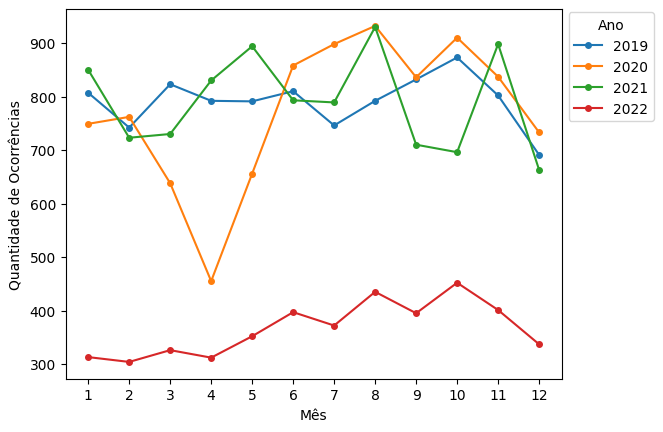

In [322]:
ax = df_filtro_mes_grupo.plot(markersize=8, style='.-', xticks = (range(1, 13, 1)), xlabel='Mês', ylabel='Quantidade de Ocorrências')
ax.legend(bbox_to_anchor=(1, 1.01)).set_title('Ano')
plt.savefig('ocorrencias_mes.svg', format='svg', dpi=600, bbox_inches='tight')

- Crimes mais recorrentes ao longo dos anos

In [315]:
df_grouped = crimes_selecionados_belem_df.groupby(['consolidado', 'vit_sexo', 'ano_fato']).size().reset_index(name='count')

In [316]:
df_grouped

,consolidado,vit_sexo,ano_fato,count
0,AMEACA,F,2019,4999
1,AMEACA,F,2020,5337
2,AMEACA,F,2021,5442
3,AMEACA,F,2022,576
4,DESCUMPRIMENTO DE MEDIDAS PROTETIVAS,F,2019,294
5,DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA,F,2020,275
6,DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA,F,2021,288
7,DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA,F,2022,237
8,ESTUPRO,F,2019,159
9,ESTUPRO,F,2020,120
